# Numerical Analysis 2017 Fall - Assignment 1 (numpy)

### Group 12 - 김명혁 & 조영우
### 2017.10.28

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

#plt.rc('text', usetex = True)
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.size"] = "15"

print('python version : ', sys.version)
print('numpy version : ', np.version.version)
print('matplotlib version :', mpl.__version__)

python version :  3.6.2 |Anaconda, Inc.| (default, Sep 19 2017, 08:03:39) [MSC v.1900 64 bit (AMD64)]
numpy version :  1.13.1
matplotlib version : 2.0.2


# Problem 1
(a) Solve the following least squares problem using any method you like: <p>
    $$
    \begin{bmatrix}
        0.16 & 0.10 \\
        0.17 & 0.11 \\
        2.02 & 1.29
    \end{bmatrix}
    \begin{bmatrix}
        x_1 \\
        x_2
    \end{bmatrix}
    \cong b
    $$
&nbsp;&nbsp;&nbsp;&nbsp; where 
$b = 
    \begin{bmatrix}
        0.26 \\
        0.28 \\
        3.31
    \end{bmatrix}
$<p>
(b) Solve the same least squares problem with $b = \begin{bmatrix} 0.27 \\ 0.25 \\ 3.33 \end{bmatrix}$ .<p>
(c) Compare your results from (a) and (b). Can you explain the difference?

In [2]:
# (a), (b)
A = np.array([[0.16, 0.10],[0.17, 0.11], [2.02, 1.29]])
b1 = np.array([[0.26], [0.28], [3.31]])
b2 = b = np.array([[0.27], [0.25], [3.33]])

normal_A = np.dot(A.T, A)
normal_b1 = np.dot(A.T, b1)
normal_b2 = np.dot(A.T, b2)

x1 = np.linalg.solve(normal_A, normal_b1)
x2 = np.linalg.solve(normal_A, normal_b2)

residual1 = np.dot(A, x1) - b1
residual2 = np.dot(A, x2) - b2
residual1 = np.sum(residual1 * residual1)
residual2 = np.sum(residual2 * residual2)

print('solution of (a)')
print(x1)
print('')
print('solution of (b)')
print(x2)
print('')
print('residual of least sqaure (a) : ', residual1)
print('residual of least sqaure (b) : ', residual2)

solution of (a)
[[ 1.]
 [ 1.]]

solution of (b)
[[ 7.00888731]
 [-8.39566299]]

residual of least sqaure (a) :  6.5248164585e-26
residual of least sqaure (b) :  0.000470138642019


(a) 의 경우는 $Ax = b_1$ 의 직선 3 개가 $(1.0, 1.0)$ 의 위치에서 만나기 때문에 exact solution 이 존재한다.<br>
따라서 least square 의 결과 역시 exact solution 과 같은 $(1.0, 1.0)$ 로 나오게 된다.<p>
하지만 (b) 는 $Ax = b_2$ 의 직선 3 개가 만나는 점이 없어 exact solution 이 존재하지 않는다.<br>
때문에 least square 의 결과는 approximate solution 인 $(7.00888731, -8.39566299)$ 로 나온다.

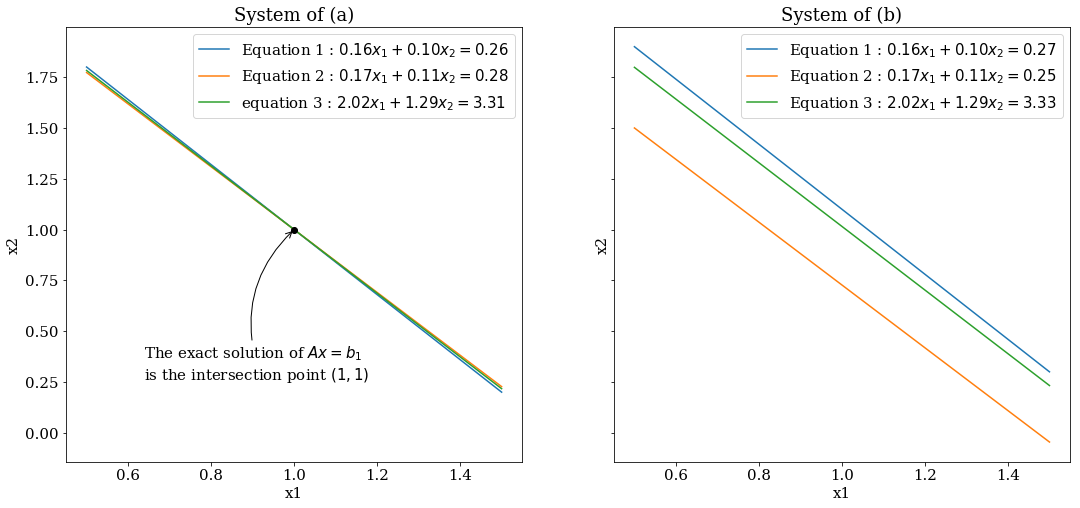

In [3]:
# (c)
x_range = np.linspace(0.5, 1.5, 100)
fig, axes = plt.subplots(1, 2, figsize = (18, 8), sharey = True)

eq0 = A[0]
eq1 = A[1]
eq2 = A[2]

a_eq0_line = (b1[0] - eq0[0] * x_range) / eq0[1]
a_eq1_line = (b1[1] - eq1[0] * x_range) / eq1[1]
a_eq2_line = (b1[2] - eq2[0] * x_range) / eq2[1]
b_eq0_line = (b2[0] - eq0[0] * x_range) / eq0[1]
b_eq1_line = (b2[1] - eq1[0] * x_range) / eq1[1]
b_eq2_line = (b2[2] - eq2[0] * x_range) / eq2[1]

axes[0].plot(x_range, a_eq0_line, label = 'Equation 1 : $0.16x_1 + 0.10x_2 = 0.26$')
axes[0].plot(x_range, a_eq1_line, label = 'Equation 2 : $0.17x_1 + 0.11x_2 = 0.28$')
axes[0].plot(x_range, a_eq2_line, label = 'equation 3 : $2.02x_1 + 1.29x_2 = 3.31$')
axes[1].plot(x_range, b_eq0_line, label = 'Equation 1 : $0.16x_1 + 0.10x_2 = 0.27$')
axes[1].plot(x_range, b_eq1_line, label = 'Equation 2 : $0.17x_1 + 0.11x_2 = 0.25$')
axes[1].plot(x_range, b_eq2_line, label = 'Equation 3 : $2.02x_1 + 1.29x_2 = 3.33$')

axes[0].plot(x1[0], x1[1], 'ko', lw = 2)
axes[0].annotate('The exact solution of $Ax = b_1$\nis the intersection point $(1, 1)$',
                 xy = x1, xycoords = 'data', xytext = (-150, -150), textcoords = 'offset points',
                arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3, rad = -0.3'))

axes[0].set_title('System of (a)')
axes[1].set_title('System of (b)')
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[1].set_xlabel('x1')
axes[1].set_ylabel('x2')
axes[0].legend()
axes[1].legend()

plt.show()

# Problem 2
Use Gaussian elimination without pivoting to solve the linear system

$$
    \begin{bmatrix}
        \epsilon & 1 \\
        1 & 1
    \end{bmatrix}
    \begin{bmatrix}
        x_1 \\
        x_2
    \end{bmatrix}
    =\begin{bmatrix}
        1 + \epsilon \\
        2
    \end{bmatrix}
    $$

for $\epsilon = 10^{-2k}, k = 1, ..., 10$. The exact solution is $x = \begin{bmatrix}1 & 1 \end{bmatrix}^{T}$, independent of the
value $\epsilon$.<br>How does the accuracy of the computed solution behave as the value of $\epsilon$
decreases?

answer : k 가 증가함에 따라 ($\epsilon$ 이 감소함에 따라) error 가 급격하게 커지는 것을 그래프를 통해 알 수 있다.

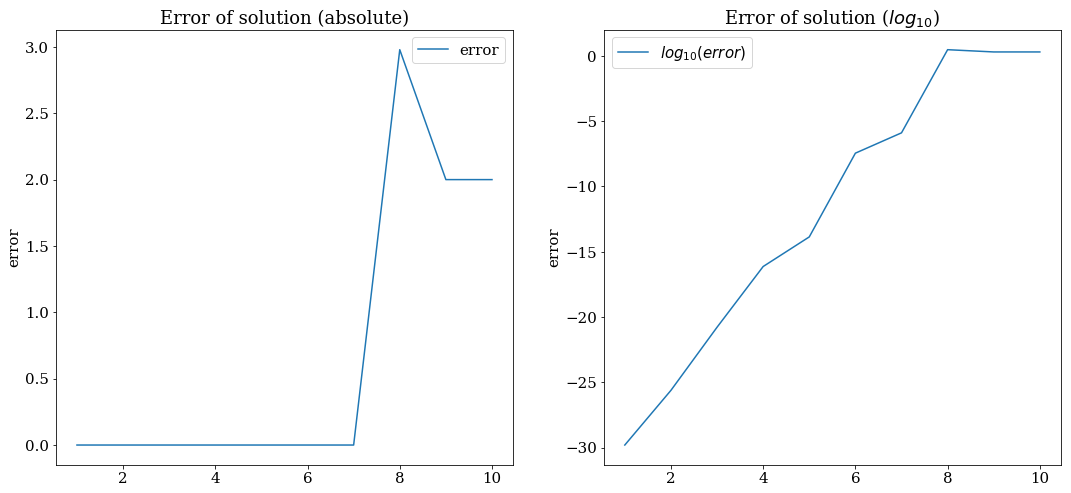

In [4]:
errors = list()
exact_sol = np.array([[1.0], [1.0]])
range_k = [k for k in range(1, 10 + 1)]

for eps_exp in range_k:
    
    eps = 1.0 / np.power(10.0, 2 * eps_exp)
    E = np.array([[eps, 1.0], [1.0, 1.0]])
    b = np.array([[1.0 + eps], [2.0]])
    
    M = np.eye(2)
    M[1, 0] = -1/eps
    
    # gaussian elimination 전체를 구현하진 않고,
    # 2 X 2 matrix 에서 바로 적용되는 형태로 사용
    E_gauss = np.dot(M, E)
    b_gauss = np.dot(M, b)
    
    x_2 = b_gauss[1] / E_gauss[1, 1]
    x_1 = (b_gauss[0] - E_gauss[0, 1] * x_2) / E_gauss[0, 0]
    sol = np.array([[x_1], [x_2]])
    
    err = sol - exact_sol
    err = np.sum(err * err)
    errors.append(err)
    
fig, axes = plt.subplots(1, 2, figsize = (18, 8))

errors = np.array(errors)

axes[0].plot(range_k, errors, label = 'error')
axes[1].plot(range_k, np.log10(errors), label = '$log_{10}(error)$')

axes[0].set_title('Error of solution (absolute)')
axes[1].set_title('Error of solution ($log_{10}$)')
axes[0].set_ylabel('error')
axes[1].set_ylabel('error')
axes[0].legend()
axes[1].legend()

plt.show()